<a href="https://colab.research.google.com/github/keniasilverio/Analises-do-Mercado-de-Cripto-com-python-/blob/main/Bitcoin_price_prediction_using_machine_learning_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bitcoin price prediction using machine learning in python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')


In [4]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()



Mounted at /content/drive


In [14]:
import yfinance as yf
import pandas as pd

def get_bitcoin_ohlc(start_date, end_date):
    ticker = "BTC-USD"
    bitcoin_data = yf.download(ticker, start=start_date, end=end_date)
    bitcoin_ohlc = bitcoin_data[["Open", "High", "Low", "Close"]].reset_index()
    bitcoin_ohlc["Date"] = bitcoin_ohlc["Date"].dt.strftime("%Y-%m-%d")
    return bitcoin_ohlc

start_date = "2014-01-01"
end_date = "2022-12-31"
bitcoin_ohlc = get_bitcoin_ohlc(start_date, end_date)

# Display OHLC data in a table
df = pd.DataFrame(bitcoin_ohlc)
print(df)


[*********************100%***********************]  1 of 1 completed
            Date          Open          High           Low         Close
0     2014-09-17    465.864014    468.174011    452.421997    457.334015
1     2014-09-18    456.859985    456.859985    413.104004    424.440002
2     2014-09-19    424.102997    427.834991    384.532013    394.795990
3     2014-09-20    394.673004    423.295990    389.882996    408.903992
4     2014-09-21    408.084991    412.425995    393.181000    398.821014
...          ...           ...           ...           ...           ...
3022  2022-12-26  16842.250000  16920.123047  16812.369141  16919.804688
3023  2022-12-27  16919.291016  16959.845703  16642.072266  16717.173828
3024  2022-12-28  16716.400391  16768.169922  16497.556641  16552.572266
3025  2022-12-29  16552.322266  16651.755859  16508.683594  16642.341797
3026  2022-12-30  16641.330078  16643.427734  16408.474609  16602.585938

[3027 rows x 5 columns]


In [15]:
df.shape

(3027, 5)

In [16]:
df.describe()

,Open,High,Low,Close
count,3027.000000,3027.000000,3027.000000,3027.000000
mean,12857.132760,13181.429151,12494.089969,12860.960943
std,16192.848432,16607.230962,15713.089474,16187.886656
min,176.897003,211.731003,171.509995,178.102997
25%,672.772003,684.252991,663.082001,674.816498
50%,7092.291504,7280.521973,6890.540039,7096.279785
75%,16809.051758,17090.261719,16534.487305,16808.360352
max,67549.734375,68789.625000,66382.062500,67566.828125


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3027 non-null   object 
 1   Open    3027 non-null   float64
 2   High    3027 non-null   float64
 3   Low     3027 non-null   float64
 4   Close   3027 non-null   float64
dtypes: float64(4), object(1)
memory usage: 118.4+ KB


Explore data analysis

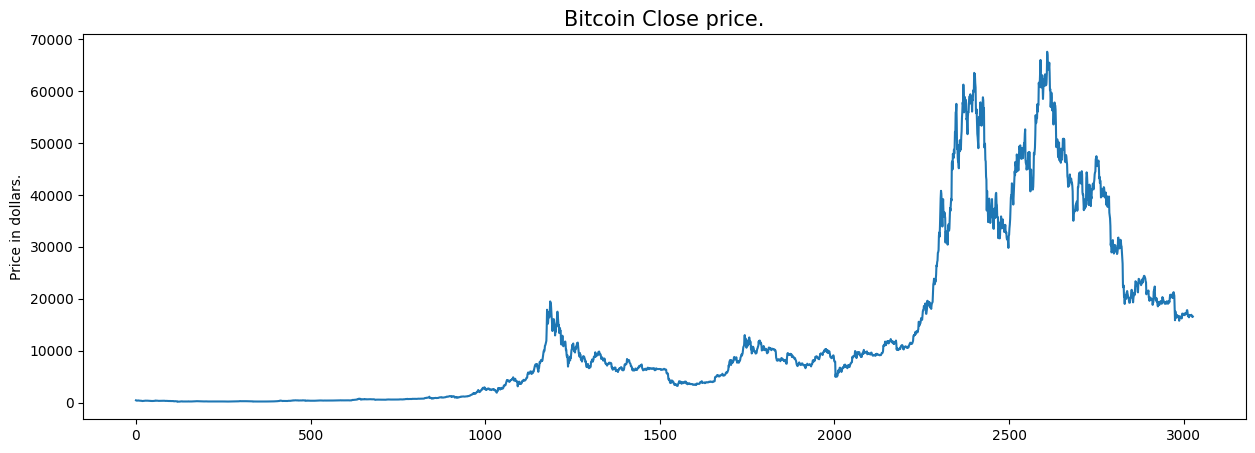

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [20]:
df.isnull().sum() #checking if the data is continuos

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [21]:
df.head()

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014


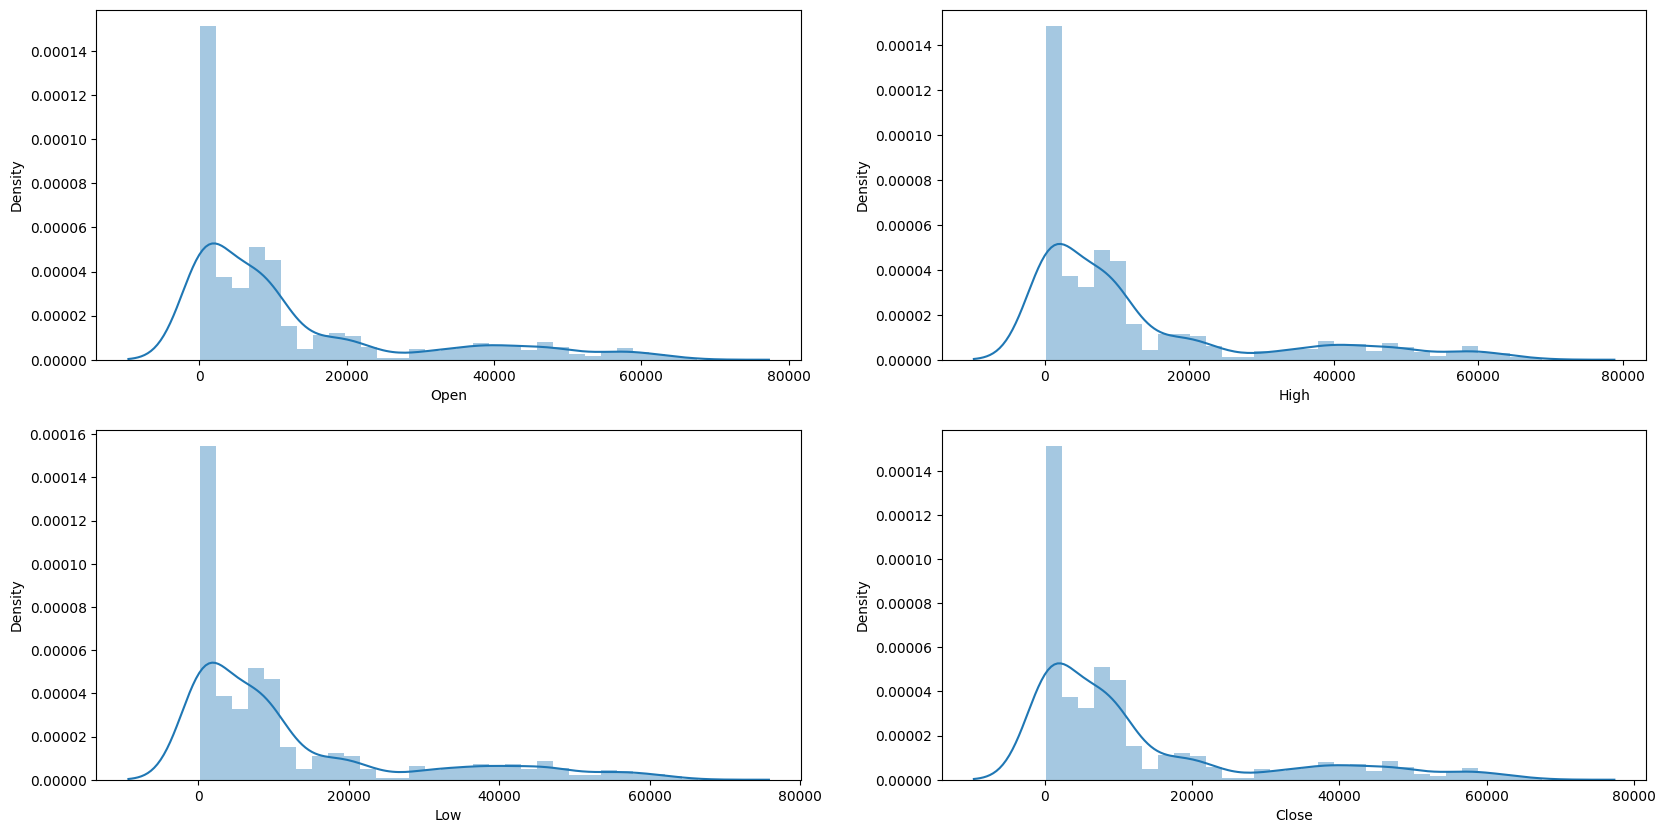

In [23]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.distplot(df[col])
plt.show()


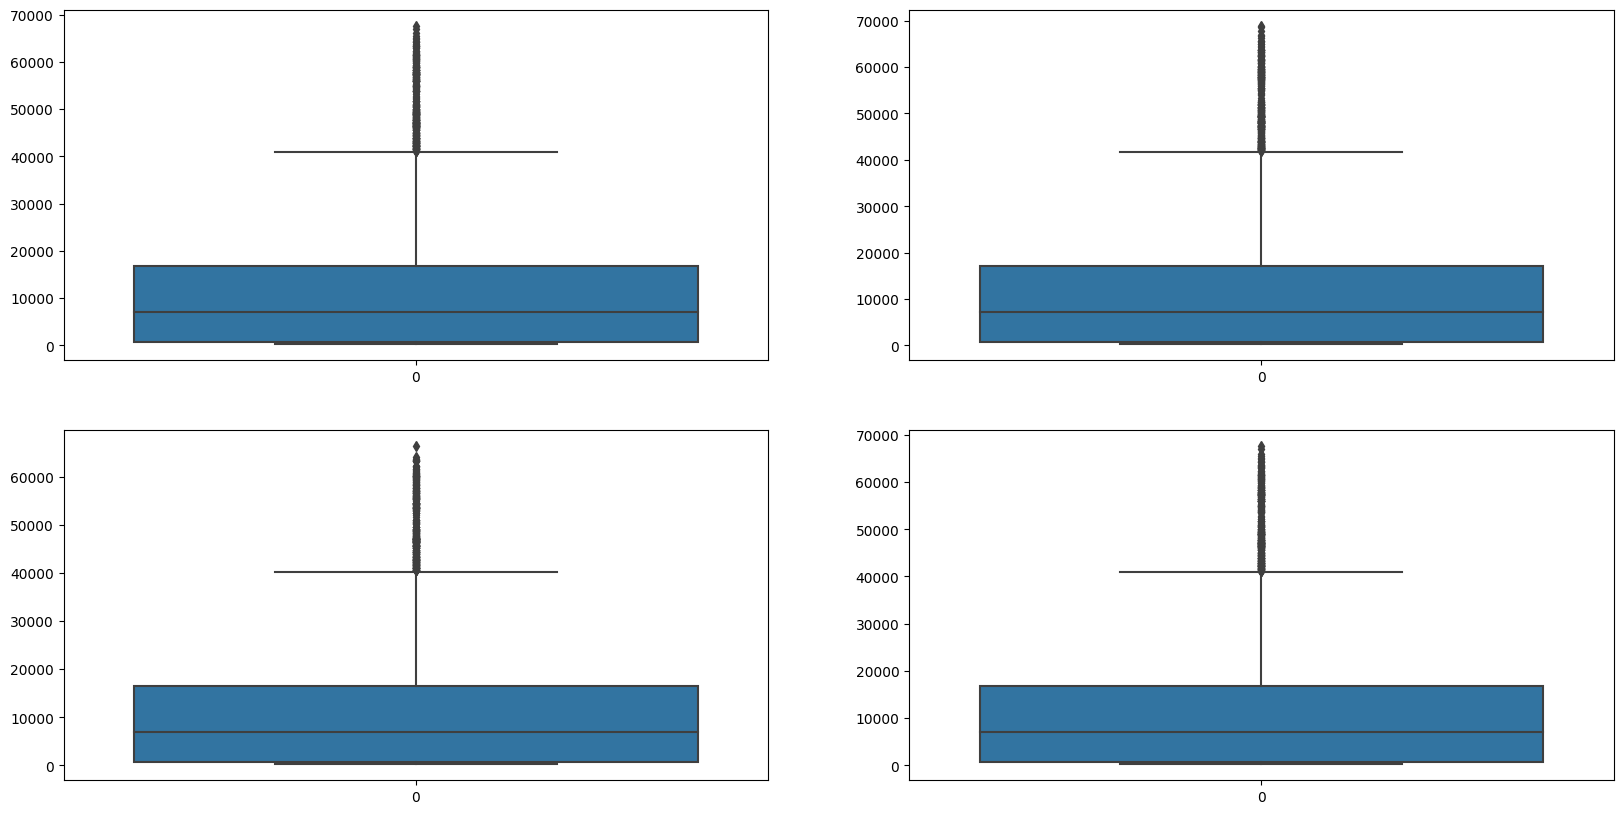

In [24]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.boxplot(df[col])
plt.show()


In [25]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df.head()


,Date,Open,High,Low,Close,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,2014,9,21


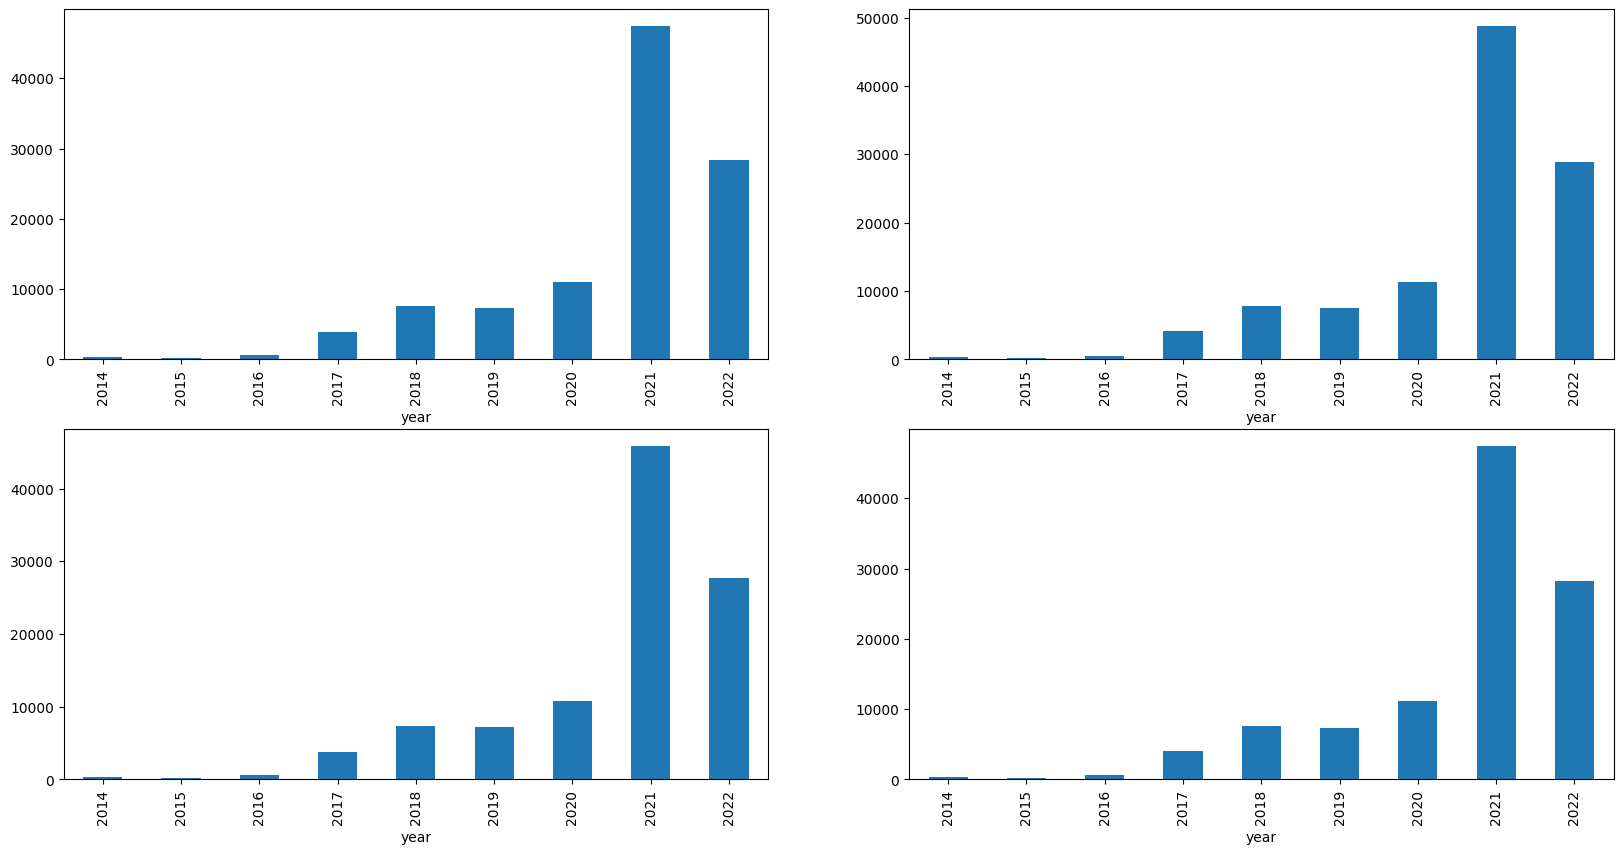

In [27]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
 plt.subplot(2,2,i+1)
 data_grouped[col].plot.bar()
plt.show()


In [28]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,2014,9,21,1


In [29]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


In [32]:
df.head()

,Date,Open,High,Low,Close,year,month,day,is_quarter_end,open-close,low-high,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,2014,9,17,1,8.529999,-15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,2014,9,18,1,32.419983,-43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,2014,9,19,1,29.307007,-43.302979,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,2014,9,20,1,-14.230988,-33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,2014,9,21,1,9.263977,-19.244995,1


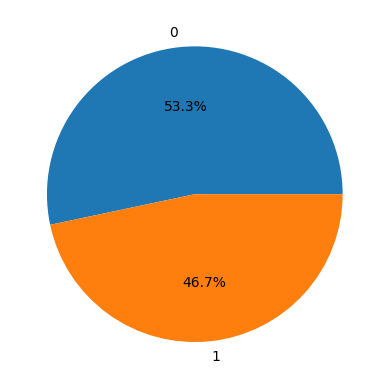

In [30]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


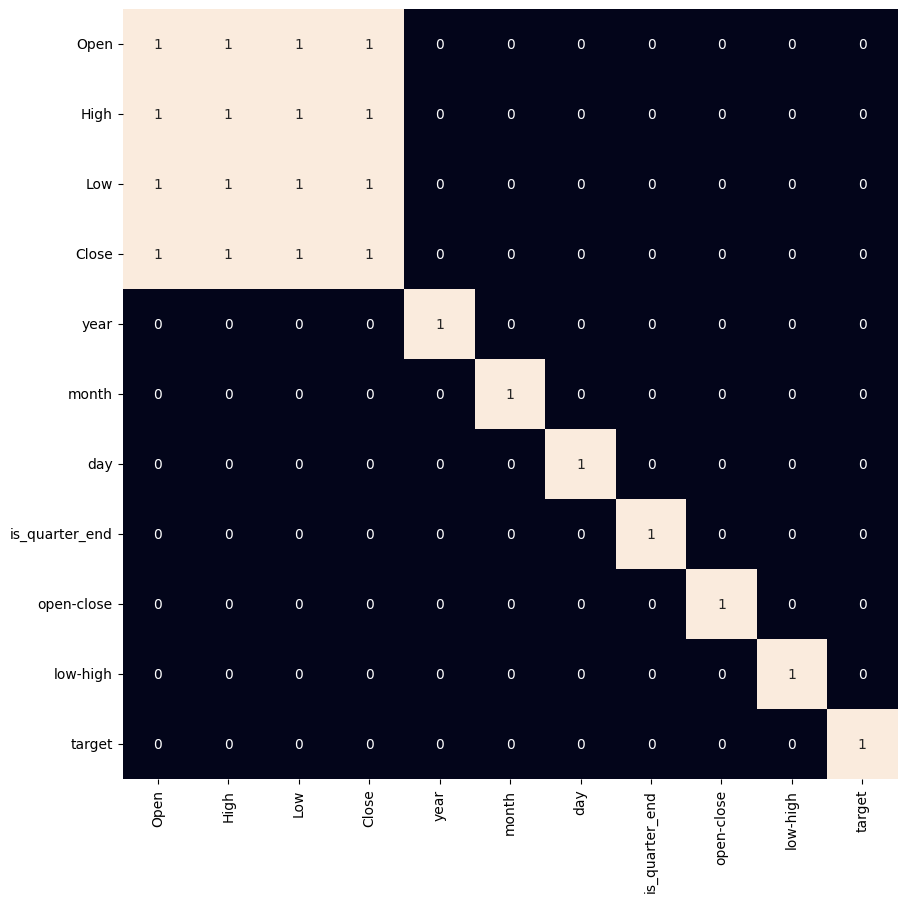

In [31]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [38]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from tqdm import tqdm


from keras import Sequential
from keras import optimizers

from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization,CuDNNLSTM, GRU, CuDNNGRU, Embedding, GlobalMaxPooling1D, GlobalAveragePooling1D, Flatten
from keras import backend as K

from keras import initializers, regularizers, constraints
from sklearn.model_selection import KFold, cross_val_score, train_test_split




In [39]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2724, 3) (303, 3)


Model Development and Evaluation 

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

import sklearn.metrics as metrics


# Your code using LogisticRegression
model = LogisticRegression()
# ...rest of your code...


In [50]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
 models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  0.9574018468932336
Validation Accuracy :  0.4798665037954803



In [57]:
import sys
print(sys.version)


3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


In [58]:
%tensorflow_version 2.x


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [62]:

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay




In [67]:
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
